In [ ]:
!pip install -q matplotlib-venn probfit
!pip install -q matplotlib-venn 'iminuit<2'

     |████████████████████████████████| 1.2MB 5.1MB/s 
     |████████████████████████████████| 327kB 15.7MB/s 
     |████████████████████████████████| 4.1MB 5.8MB/s 


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from probfit import Chi2Regression
from iminuit import Minuit

## Confirmation of paper

In [ ]:
k1 = 30
k2 = 1
k3 = 10
k4 = 1
k5 = 16.5
k_5 = 0.5
k_1 = 0.25
c1 = 1
c2 = 0
c3 = 0

In [ ]:
def ODE(t,vars):
  x1 = vars[0]
  x2 = vars[1]
  x3 = vars[2]
  y1 = vars[3]
  y2 = vars[4]
  y3 = vars[5]
  z1 = vars[6]
  z2 = vars[7]
  z3 = vars[8]


  dx1dt = k1*x1 - k_1*(x1**2) - k2*x1*x2 -k4*x1*x3
  dx2dt = k2*x1*x2 - k3*x2
  dx3dt = -k4*x1*x3 + k5*x3 -k_5*(x3**2)

  dy1dt = k1*y1 - k_1*(y1**2) - k2*y1*y2 -k4*y1*y3 + z1*(y1-x1)
  dy2dt = k2*y1*y2 - k3*y2 + z2*(y2-x2)
  dy3dt = -k4*y1*y3 + k5*y3 -k_5*(y3**2) + z3*(y3-x3)

  dz1dt = -c1*(y1-x1)**2
  dz2dt = -c2*(y2-x2)**2
  dz3dt = -c3*(y3-x3)**2

  dt = np.array([dx1dt, dx2dt, dx3dt, dy1dt, dy2dt, dy3dt, dz1dt, dz2dt, dz3dt])
  return dt

In [ ]:
t_span = np.array([0,1])
initial = np.array([1, 1, 1, 50, 50, 50, 0, 0, 0])

In [ ]:
soln = solve_ivp(ODE, t_span, initial)

In [ ]:
  x1 = soln.y[0]
  x2 = soln.y[1]
  x3 = soln.y[2]
  y1 = soln.y[3]
  y2 = soln.y[4]
  y3 = soln.y[5]
  z1 = soln.y[6]
  z2 = soln.y[7]
  z3 = soln.y[8]
  t= soln.t

Text(0.5, 0, 't')

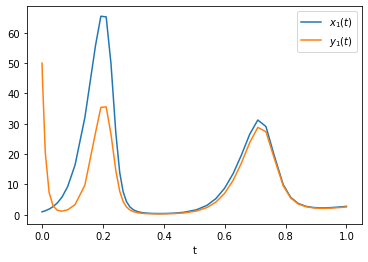

In [ ]:
plt.plot(t, x1, label = "$x_1(t)$")
plt.plot(t, y1, label = "$y_1(t)$")
plt.legend()
plt.xlabel("t")
#plt.savefig(fname = "x1y1_only_c1")

Text(0, 0.5, 'Difference')

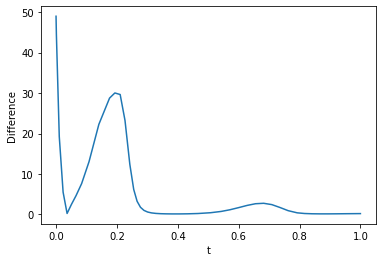

In [ ]:
plt.plot(t, np.abs(y1-x1))
plt.xlabel("t")
plt.ylabel("Difference")
#plt.savefig(fname = "x1y1_only_c1_diff_zoom")

## Transient Check

In [ ]:
def time_to_chill(x, y, t):
  tolerance = 0.05
  test = np.isclose(x, y, rtol = 0, atol = tolerance)
  arr = np.array([False, False, False, False, False])
  for i in range(1, len(x)-1):
    if not test[-i-5:-i].any():
      return t[-i]

In [ ]:
lim = 10
step = 0.1
start = 0.1
steps = np.arange(start, lim, step)
N = len(steps)
trans_times = np.zeros(N)
t_span = np.array([0,15])
y_0 = np.array([1, 1, 1, 50, 50, 50, 0, 0, 0])


In [ ]:
if True:
  for i in range(N):
    c1 = steps[i]
    c2 = 0
    c3 = 0
    temp_sol = solve_ivp(ODE, t_span, y_0)
    x, y, t = temp_sol.y[0], temp_sol.y[3], temp_sol.t
    trans_times[i] = time_to_chill(x, y, t)

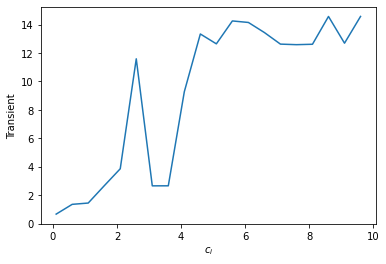

In [ ]:
plt.plot(steps, trans_times)
plt.xlabel("$c_i$")
plt.ylabel("Transient")
plt.savefig("Transient_vs_c_zoom")

## Initial conditions and control parameters

In [ ]:
lim = 100
step = 1
start = 0
initial_values = np.arange(start, lim, step)
N = len(initial_values)
z1_final_vals = np.zeros(N)
t_span = np.array([0,1])
y_0 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0])
c1 = 1
c2 = 0
c3 = 0

Text(0, 0.5, '$z_1$ final value')

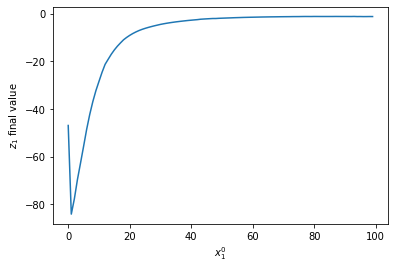

In [ ]:
for i in range(N):
  y_0[0] = initial_values[i]
  y_0[3] = initial_values[i] - 5
  temp_sol = solve_ivp(ODE, t_span, y_0)
  z1 = temp_sol.y[6]
  z1_final_vals[i] = z1[-1]

plt.plot(initial_values, z1_final_vals,)
plt.xlabel("$x_1^0$")
plt.ylabel("$z_1$ final value")
#plt.savefig("z1x1_5_diff")

In [ ]:
lim = 0
step = 10
start = -1000
initial_values = np.arange(start, lim, step)
N = len(initial_values)
z1_final_vals = np.zeros(N)
t_span = np.array([0,20])
y_0 = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0])
c1 = 1
c2 = 0
c3 = 0

Text(0, 0.5, '$z_1$ final value')

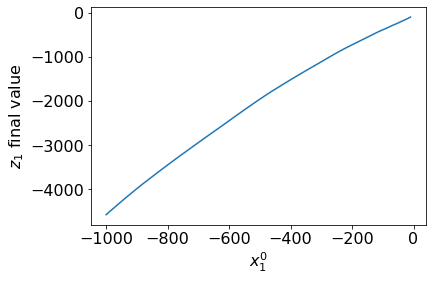

In [ ]:
for i in range(N):
  y_0[0] = initial_values[i]
  temp_sol = solve_ivp(ODE, t_span, y_0)
  z1 = temp_sol.y[6]
  z1_final_vals[i] = z1[-1]
  
plt.plot(initial_values , z1_final_vals,)
plt.xlabel("$x_1^0$")
plt.ylabel("$z_1$ final value")
#plt.savefig("z1x1_50")

#### Fit

In [ ]:
def get_chisquared(X, y, y_err, func, title, initial):
  reg = Chi2Regression(func, X, y, y_err, weights=None)  
  opt = Minuit(reg, a = initial[0], b = initial[1],c = initial[2] )
  opt.migrad()

  plt.rc("font", size=16, family="Times New Roman")
  fig = plt.figure(figsize=(8, 5))
  ax = fig.add_axes([0,0,1,1])
  ax.set_xlabel("$x_1^0$", fontdict={"size": 20, "weight":"bold"})
  ax.set_ylabel("$z_1$", fontdict={"size": 20, "weight":"bold"})
  ax.errorbar(x=X, y=y,yerr=y_err, capsize=4, elinewidth=3, fmt='none', ecolor="blue")
  ax.scatter(X,y, c='blue', s=30)
  reg.show()
  return opt.fval

In [ ]:
func_exp = lambda x, a, b, c: a * np.exp(x*b) + c
func_poly = lambda x, a, c: a * x**2 + c
lin_func = lambda x, a, b: a*x + b

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using .default_errordef() is deprecated. Use .errordef instead
  """Entry point for launching an IPython kernel.


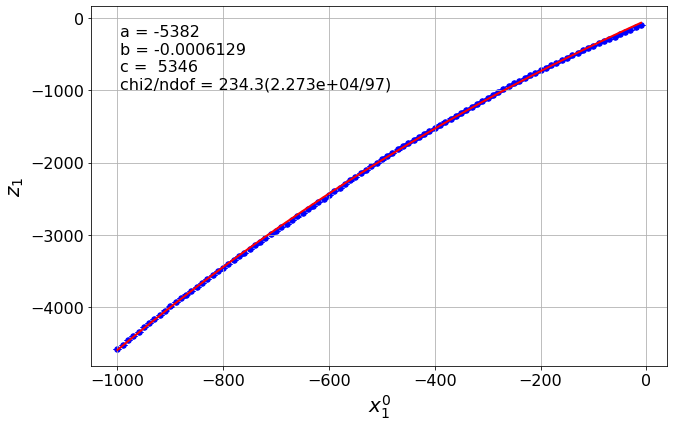

22725.196205629887

In [ ]:
get_chisquared(initial_values, z1_final_vals, np.ones(N), func_exp, "$z_1$ vs $x_1^0$ ", [-1,1,500])